## Testing enviornment setup

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 

print("All packages imported successfully!")
print(f"Pandas version: {pd.__version__}") 

# Test loading the data file 
df = pd.read_csv('UNRATE.csv') 
print(f"Data loaded successfully! Shape: {df.shape}")

All packages imported successfully!
Pandas version: 2.3.0
Data loaded successfully! Shape: (928, 2)


## Business Analysis

##### Data Loading & Exploration

In [22]:
#Library imports and data loading complete in the above cell
df.head()

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [23]:
df.tail()

,observation_date,UNRATE
923,2024-12-01,4.1
924,2025-01-01,4.0
925,2025-02-01,4.1
926,2025-03-01,4.2
927,2025-04-01,4.2


In [24]:
df = df.rename(columns={'observation_date': 'DATE'})
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    928 non-null    datetime64[ns]
 1   UNRATE  928 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


In [25]:
df.isnull().sum()


DATE      0
UNRATE    0
dtype: int64

In [26]:
df['UNRATE'].describe()

count    928.000000
mean       5.676724
std        1.708352
min        2.500000
25%        4.300000
50%        5.500000
75%        6.700000
max       14.800000
Name: UNRATE, dtype: float64

##### Statistical Analysis

In [27]:
# Overall Average Unemployment Rate
overall_avg_unemployment = df['UNRATE'].mean().round(2)
print(f"Overall Average Unemployment Rate: {overall_avg_unemployment}%")

Overall Average Unemployment Rate: 5.68%


In [28]:
# Minimum and Maximum Unemployment Rate and their respective dates
min_unemployment_rate = df['UNRATE'].min()
max_unemployment_rate = df['UNRATE'].max()

min_dates = df.loc[df['UNRATE'] == min_unemployment_rate, 'DATE']
max_dates = df.loc[df['UNRATE'] == max_unemployment_rate, 'DATE']

# Conversion to list of formatted strings
min_dates_str = ', '.join(date.strftime('%B %Y') for date in min_dates)
max_dates_str = ', '.join(date.strftime('%B %Y') for date in max_dates)

print(f"Minimum Unemployment Rate: {min_unemployment_rate}% on {min_dates_str}")
print(f"Maximum Unemployment Rate: {max_unemployment_rate}% on {max_dates_str}")


Minimum Unemployment Rate: 2.5% on May 1953, June 1953
Maximum Unemployment Rate: 14.8% on April 2020


In [39]:
# Average Unemployment Rate by Year
df['Year'] = df['DATE'].dt.year
average_unemployment_by_year = df.groupby('Year')['UNRATE'].mean().round(2)

# Conversion to DataFrame and add percentage sign
formatted_avg_by_year = average_unemployment_by_year.astype(str) + '%'
formatted_avg_by_year = formatted_avg_by_year.reset_index()
formatted_avg_by_year.columns = ['Year', 'Avg Unemployment Rate (%)']
  
print("Average Unemployment Rate by Year:")
print(formatted_avg_by_year.to_string(index=False))


Average Unemployment Rate by Year:
 Year Avg Unemployment Rate (%)
 1948                     3.75%
 1949                     6.05%
 1950                     5.21%
 1951                     3.28%
 1952                     3.02%
 1953                     2.92%
 1954                     5.59%
 1955                     4.37%
 1956                     4.12%
 1957                      4.3%
 1958                     6.84%
 1959                     5.45%
 1960                     5.54%
 1961                     6.69%
 1962                     5.57%
 1963                     5.64%
 1964                     5.16%
 1965                     4.51%
 1966                     3.79%
 1967                     3.84%
 1968                     3.56%
 1969                     3.49%
 1970                     4.98%
 1971                     5.95%
 1972                      5.6%
 1973                     4.86%
 1974                     5.64%
 1975                     8.48%
 1976                      7.7%
 1977

In [30]:
# Finding min and max average values by year
min_avg = average_unemployment_by_year.min()
max_avg = average_unemployment_by_year.max()

# Getting corresponding years (in case there are ties)
min_years = average_unemployment_by_year[average_unemployment_by_year == min_avg].index.tolist()
max_years = average_unemployment_by_year[average_unemployment_by_year == max_avg].index.tolist()

# Formatting years as comma-separated strings
min_years_str = ', '.join(str(year) for year in min_years)
max_years_str = ', '.join(str(year) for year in max_years)

print(f"Year(s) with Minimum Average Unemployment Rate: {min_years_str} {min_avg}% ")
print(f"Year(s) with Maximum Average Unemployment Rate: {max_years_str} {max_avg}% ")

Year(s) with Minimum Average Unemployment Rate: 1953 2.92% 
Year(s) with Maximum Average Unemployment Rate: 1982 9.71% 


In [45]:
# Unemployment Statistics by Decade
df['Decade'] = (df['Year'] // 10) * 10

# Calculating average unemployment
decade_avg = df.groupby('Decade')['UNRATE'].mean().round(2)

# Finding min and max averages
min_decade_value = decade_avg.min()
max_decade_value = decade_avg.max()

# Checking if 2 or more decades have matching unemployment rates
min_decades = decade_avg[decade_avg == min_decade_value].index.tolist()
max_decades = decade_avg[decade_avg == max_decade_value].index.tolist()

# Formatting output
min_decades_str = ', '.join(str(d) + 's' for d in min_decades)
max_decades_str = ', '.join(str(d) + 's' for d in max_decades)

print("Decade Averages:")
print(decade_avg.astype(str) + '%')

print(f"\nDecade(s) with Minimum Average Unemployment: {min_decades_str} ({min_decade_value}%)")
print(f"Decade(s) with Maximum Average Unemployment: {max_decades_str} ({max_decade_value}%)")
print(f"\nDecades 1940 and 2020 are incomplete - less than 10 years of data.")


Decade Averages:
Decade
1940     4.9%
1950    4.51%
1960    4.78%
1970    6.22%
1980    7.27%
1990    5.76%
2000    5.54%
2010    6.22%
2020     4.9%
Name: UNRATE, dtype: object

Decade(s) with Minimum Average Unemployment: 1950s (4.51%)
Decade(s) with Maximum Average Unemployment: 1980s (7.27%)

Decades 1940 and 2020 are incomplete - less than 10 years of data.


# Business Questions

In [46]:
# What was the unemployment rate during major economic events (2008 financial crisis, COVID-19 pandemic)?

# 2008 Finacial Crisis Period: December 2007 to June 2009 as determined by the National Bureau of Economic Research (NBER)
unemp_2008_financial_crisis = df[(df['DATE'] >= '2007-12-01') & (df['DATE'] <= '2009-06-30')]

#min and max unemployment rates during this period
min_unemp_2008 = unemp_2008_financial_crisis['UNRATE'].min()
max_unemp_2008 = unemp_2008_financial_crisis['UNRATE'].max()
print(f"Minimum Unemployment Rate during 2008 Financial Crisis: {min_unemp_2008}%")
print(f"Maximum Unemployment Rate during 2008 Financial Crisis: {max_unemp_2008}%")

# % increase in unemployment rate from start to end of the crisis
print(f"\n% Increase in unemployment from start to end: {max_unemp_2008 - min_unemp_2008}%")

# average unemployment rate during this period
avg_unemp_2008 = unemp_2008_financial_crisis['UNRATE'].mean().round(2)
print(f"Average Unemployment Rate during 2008 Financial Crisis: {avg_unemp_2008}%")

# Unemployment trend post 2008 Financial Crisis

# how many months until the unemployment rate was less than 6%?
# Used GenAI to determine the code for the number of months and date when the unemployment rate first fell below 6% after the 2008 financial crisis
post_crisis_period = df[(df['DATE'] >= '2009-07-01') & (df['UNRATE'] < 6)]
months_until_below_6 = post_crisis_period['DATE'].min() - pd.Timestamp('2009-07-01')
months_until_below_6 = months_until_below_6.days // 30  # Convert to months
print(f"Months until unemployment rate was below 6% after 2008 Financial Crisis: {months_until_below_6} months")

# Peak unemployment date and rate after the 2008 financial crisis till rate reached below 6%
post_crisis_window = df[(df['DATE'] >= '2009-07-01')]

first_below_6_date = post_crisis_window[post_crisis_window['UNRATE'] < 6]['DATE'].min()

recovery_period = df[(df['DATE'] >= '2009-07-01') & (df['DATE'] <= first_below_6_date)]

peak_value = recovery_period['UNRATE'].max()
peak_date = recovery_period[recovery_period['UNRATE'] == peak_value]['DATE'].iloc[0]

print(f"Peak Unemployment After 2008 Crisis (before falling below 6%): {peak_value}% on {peak_date.strftime('%B %Y')}")
print(f"First Month Below 6%: {first_below_6_date.strftime('%B %Y')}")




Minimum Unemployment Rate during 2008 Financial Crisis: 4.9%
Maximum Unemployment Rate during 2008 Financial Crisis: 9.5%

% Increase in unemployment from start to end: 4.6%
Average Unemployment Rate during 2008 Financial Crisis: 6.7%
Months until unemployment rate was below 6% after 2008 Financial Crisis: 62 months
Peak Unemployment After 2008 Crisis (before falling below 6%): 10.0% on October 2009
First Month Below 6%: September 2014


In [33]:
# COVID-19 Pandemic Period: March 2020 to March 2023
unemp_covid_pandemic = df[(df['DATE'] >= '2020-03-01') & (df['DATE'] <= '2023-03-31')]

# Average unemployment rate
avg_unemp_covid = unemp_covid_pandemic['UNRATE'].mean().round(2)

# Minimum and maximum rates
min_unemp_covid = unemp_covid_pandemic['UNRATE'].min()
max_unemp_covid = unemp_covid_pandemic['UNRATE'].max()

# Corresponding dates
min_date_covid = unemp_covid_pandemic[unemp_covid_pandemic['UNRATE'] == min_unemp_covid]['DATE'].iloc[0]
max_date_covid = unemp_covid_pandemic[unemp_covid_pandemic['UNRATE'] == max_unemp_covid]['DATE'].iloc[0]

print(f"COVID-19 Period (Mar 2020 – Mar 2023):")
print(f"Average Unemployment Rate: {avg_unemp_covid}%")
print(f"Minimum Unemployment Rate: {min_unemp_covid}% on {min_date_covid.strftime('%B %Y')}")
print(f"Maximum Unemployment Rate: {max_unemp_covid}% on {max_date_covid.strftime('%B %Y')}")


COVID-19 Period (Mar 2020 – Mar 2023):
Average Unemployment Rate: 5.64%
Minimum Unemployment Rate: 3.5% on July 2022
Maximum Unemployment Rate: 14.8% on April 2020


In [47]:
# Define the start and end months for each March-to-March window
march_years = [
    ('2020-03-01', '2021-03-31'),
    ('2021-03-01', '2022-03-31'),
    ('2022-03-01', '2023-03-31')
]

# Calculating average unemployment rate for each period
print("Average Unemployment Rate (March - March):")
for start, end in march_years:
    period_df = df[(df['DATE'] >= start) & (df['DATE'] <= end)]
    avg = period_df['UNRATE'].mean().round(2)
    print(f"{pd.to_datetime(start).strftime('%b %Y')} – {pd.to_datetime(end).strftime('%b %Y')}: {avg}%")


Average Unemployment Rate (March - March):
Mar 2020 – Mar 2021: 8.37%
Mar 2021 – Mar 2022: 4.86%
Mar 2022 – Mar 2023: 3.58%


In [ ]:
# Which decade had the most stable unemployment rates (lowest standard deviation)?

decade_std = df.groupby('Decade')['UNRATE'].std().round(2)

# Find the decade with the minimum standard deviation
min_std_decade = decade_std.idxmin()
min_std_value = decade_std.min()    
print(f"Decade with the most stable unemployment rates: {min_std_decade}s with a standard deviation of {min_std_value}%")

Decade with the most stable unemployment rates: 1990s with a standard deviation of 1.05%


Decade
1940    1.38
1950    1.29
1960    1.07
1970    1.16
1980    1.48
1990    1.05
2000    1.45
2010    2.06
2020    2.28
Name: UNRATE, dtype: float64

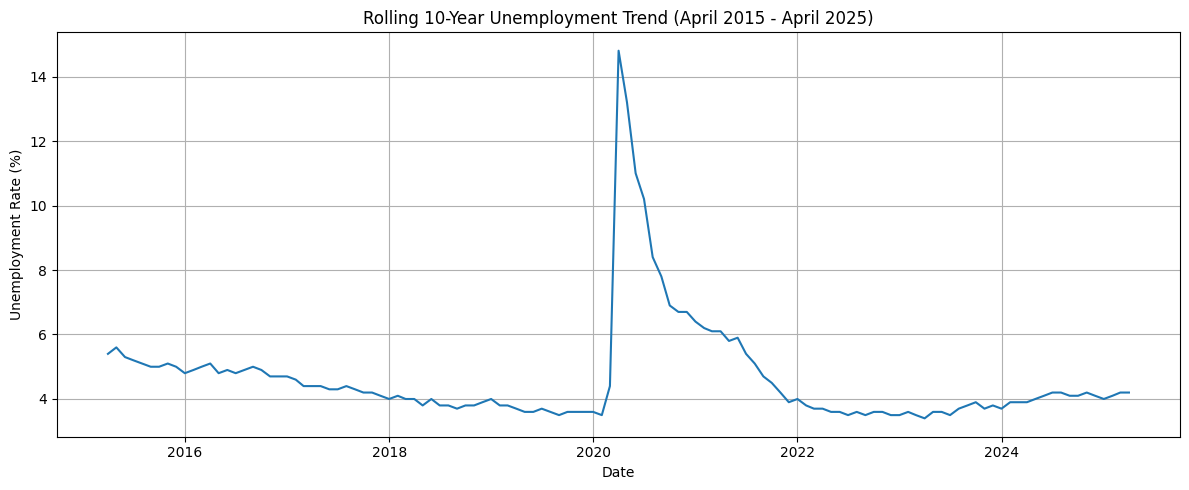

Rolling 10-Year Period: April 2015 to April 2025
Average Unemployment Rate (Rolling): 4.64%


In [ ]:
# What’s the trend in unemployment over the last 10 years?

# Rolling 10-year window from Aprl 2025
latest_date = df['DATE'].max()
start_rolling = latest_date - pd.DateOffset(years=10) #Used GenAI to determine the code for the rolling 10-year window

rolling_df = df[(df['DATE'] >= start_rolling) & (df['DATE'] <= latest_date)]
avg_rolling = rolling_df['UNRATE'].mean().round(2)

plt.figure(figsize=(12, 5))
plt.plot(rolling_df['DATE'], rolling_df['UNRATE'], linestyle='-')
plt.title('Rolling 10-Year Unemployment Trend (April 2015 - April 2025)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.savefig('unemployment_analysis_1.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Rolling 10-Year Period: {start_rolling.strftime('%B %Y')} to {latest_date.strftime('%B %Y')}")
print(f"Average Unemployment Rate (Rolling): {avg_rolling}%")

## Data Visualization

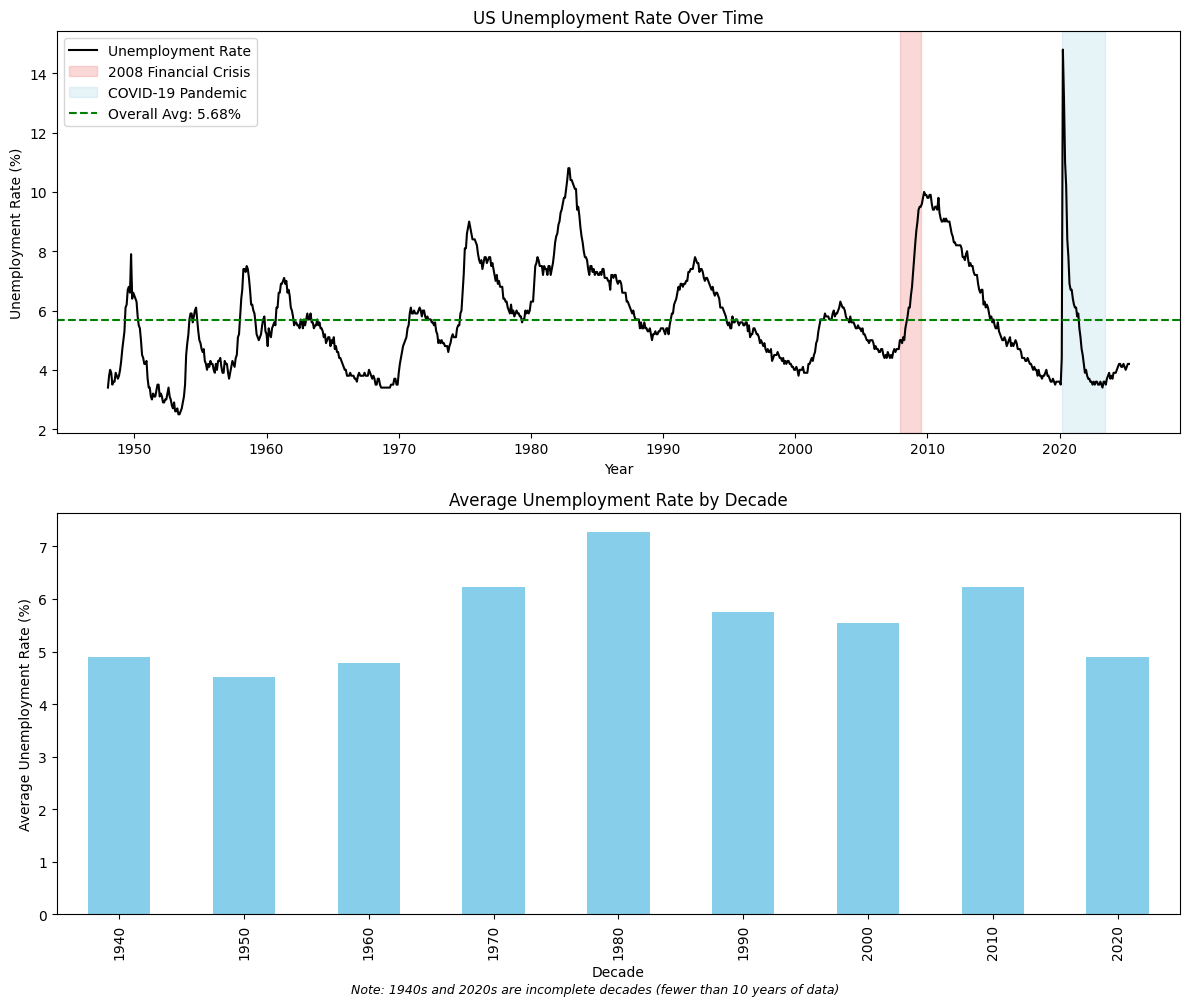

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Time series plot
ax1.plot(df['DATE'], df['UNRATE'], color='black', label='Unemployment Rate')

# Mark 2008 Financial Crisis
# Use GenAI to determine the code for marking the 2008 financial crisis
crisis_2008_start = pd.to_datetime('2007-12-01')
crisis_2008_end = pd.to_datetime('2009-06-30')
ax1.axvspan(crisis_2008_start, crisis_2008_end, color='lightcoral', alpha=0.3, label='2008 Financial Crisis')

# Mark COVID-19 Pandemic
covid_start = pd.to_datetime('2020-03-01')
covid_end = pd.to_datetime('2023-05-31')
ax1.axvspan(covid_start, covid_end, color='lightblue', alpha=0.3, label='COVID-19 Pandemic')

# Adding overall average unemployment rate line
overall_avg = 5.68
ax1.axhline(y=overall_avg, color='green', linestyle='--', linewidth=1.5, label=f'Overall Avg: {overall_avg}%')

# Titles and labels
ax1.set_title('US Unemployment Rate Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)')
ax1.legend()

# Bar chart: Average unemployment by decade
decade_avg.plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Average Unemployment Rate by Decade')
ax2.set_xlabel('Decade')
ax2.set_ylabel('Average Unemployment Rate (%)')
# Adding footnote below bar chart
fig.text(0.5, 0.001, 'Note: 1940s and 2020s are incomplete decades (fewer than 10 years of data)',
         ha='center', fontsize=9, style='italic')


plt.tight_layout()
plt.savefig('unemployment_analysis_2.png', dpi=300, bbox_inches='tight')
plt.show()
